In [ ]:
# default_exp model
# %load_ext lab_black

# nb_black if running in jupyter
%load_ext nb_black

%load_ext autoreload
# automatically reload python modules if there are changes in the
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [ ]:
# hide
from nbdev.showdoc import *

<IPython.core.display.Javascript object>

# Model

> In this notebook you create and test a Python class to hold your machine learning model.

***input***: toy dataset from data-notebook

***output***: python module containing ML model class 

***description:***

In this notebook you hypothetize, explain and explore machine learning models to solve your problem.

Then, you should encapsulate the model inside a Python class to be exported into `your_repository/your_module/model.py`,
so that it can be evaluated in the loss notebook, and intergrated with your target application.
Repository name and module name are the same by default.
You should also unit test the classes created in this notebook with the toy data created in data notebook.

You should probably have a person in your team familiar with object oriented programming with python and unit testing, but if not, don't worry.
If you can explore by scripting in the cells and create a draft of the properties and functions you want to have, and that's a great start.
Then, any Python developer can easily build the model class for you.
However, we encourage you to learn more on [object oriented programming with Python](https://realpython.com/python3-object-oriented-programming/)
and [getting started with unit testing in Python](https://realpython.com/python-testing/).
You can also follow the example here to create your own simple machine learning Python class.

This notebook contains an example ML model for classifying the heart disease dataset with logistic regression.

The example is split into a base class and a subclass for demonstrating class inheritance of Python.
You can probably just write one class that contains all the attributes and functions you need, without inheriting anything.
However, alternative implementations of a model might be implemented in separate subclasses, for example.
You can also define multiple classes, for example one for ML model and another for optimization.
If the methods are complicated or you are comparing multiple methods that don't share common functions, 
you can also separate models or subclasses to different notebooks similar to this.
Adjust the running number, name, header and top cell `#default_exp module_name` of the notebooks accordingly.

Remember to add `# export` to top of all cells containing functions or classes that you have defined and want to use outside this notebook.



## Import relevant modules

In [ ]:
# export
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    train_test_split,
    StratifiedKFold,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>

In [ ]:
# FIX THIS!!!!

# Use 'nbdev_build_lib' shell command to update library
# from ml_project_template.plot import plot_trellis, plot_histogram

<IPython.core.display.Javascript object>

## Define notebook parameters

Remember, only simple assignments here!

In [ ]:
# Parameters

# this cell is tagged with 'parameters'
toy_data_file = "data/preprocessed_data/dataset_toy_all_classes.csv"
all_classes_data_file = "data/preprocessed_data/dataset_clean_all_classes.csv"
input_data_file = "data/preprocessed_data/input_file.csv"
seed = 0

<IPython.core.display.Javascript object>

Make immediate derivations from the parameters:

In [ ]:
np.random.seed(seed)

<IPython.core.display.Javascript object>

## Import toy data for testing

In [ ]:
toy_df = pd.read_csv(toy_data_file, index_col=0)
toy_df.head(30)

,record_id,084,092,093,094,095,650
40826,420909226072,78.89700,78.89170,78.8917,78.89170,788.830,NaN
50227,420909204870,78.89113,78.89110,78.8911,NaN,788.330,NaN
70429,420908537805,99.10000,77.19200,NaN,77.19200,770.921,"näyttelijät,elokuvanäyttelijät,laulajat,iskelm..."
3171,420907800313,30.12000,30.12000,30.1200,30.12000,357.000,"maailmankuva,arvot,sukupuoli,tanssi,ympäristö,..."
99360,420908893012,78.89112,78.89112,NaN,78.89112,788.332,"heavy rock,death metal"
31897,420908507234,78.89320,NaN,NaN,78.89320,788.410,"viihdeohjelmat,musiikki,televisio-ohjelmat,huu..."
26220,420909108380,99.23000,NaN,NaN,92.73000,928.100,"virolaiset,vapaaehtoiset,sotilaat,jatkosota,to..."
102930,420909221339,78.89110,78.89110,NaN,NaN,788.330,NaN
98161,420908060431,22.20000,22.20000,NaN,22.20000,226.000,NaN
7428,420908985491,48.18400,48.18400,NaN,48.18400,427.000,NaN


<IPython.core.display.Javascript object>

In [ ]:
def keywords_to_features(df_to_parse, keywords=[]):
    """
    Parse dataframe keywords and create features of them
    """
    #print(f"KEYWORDS: {len(keywords)}")
    
    # Create keyword list
    if len(keywords) == 0:
        for i in range(len(df_to_parse)):
            item_keywords_str = (str)(df_to_parse.iloc[(i), 6])
            item_keywords_lst = item_keywords_str.split(",")
            
            for word in item_keywords_lst:
                word = word.strip().lower()
                if word not in keywords:
                    keywords.append(word)
            
    # Add keyword columns with keyword as a title (value will be 0 or 1 depending if the keyword belongs to the volume or not)
    # NOTE: "A Pandas Series is like a column in a table" (https://www.w3schools.com/python/pandas/pandas_series.asp)
    for i in range(len(keywords)):
        df_to_parse[keywords[i]] = pd.Series([], dtype="int64")
        df_to_parse = df_to_parse.reset_index(drop=True)
        
    # Fill features with keywords attached to item with value "1"
    for i in range(len(df_to_parse)):
        item_keywords_str = (str)(df_to_parse.iloc[(i), 6])
        item_keywords_lst = item_keywords_str.split(",")
        
        for word in item_keywords_lst:
            word = word.strip().lower()
            if word in keywords:
                df_to_parse.at[i, word] = 1
            
    # Drop column with comma-separated keywords and fill NaN with 0
    df_to_parse = df_to_parse.drop(["650"], axis=1)
    df_to_parse = df_to_parse.fillna(0)
    
    #print(f"DF TO PARSE SHAPE: {df_to_parse.shape}")
    #print(f"KEYWORDS: {len(keywords)}")
    return df_to_parse, keywords
    

toy_df, keywords = keywords_to_features(toy_df)

# printing final dataset for training and validating the model
print(f"\n*****")
print(
    f"Input data: {toy_df.shape[0]} rows."
)
print(f"Number of keywords in input dataset is: {toy_df.shape[1] - 6}={len(keywords)}")
print(f"*****\n")
toy_df.head()



*****
Input data: 100 rows.
Number of keywords in input dataset is: 481=481
*****



,record_id,084,092,093,094,095,nan,näyttelijät,elokuvanäyttelijät,laulajat,...,turvallisuuspolitiikka,joustavuus,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen
0,420909226072,78.89700,78.89170,78.8917,78.89170,788.830,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,420909204870,78.89113,78.89110,78.8911,0.00000,788.330,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,420908537805,99.10000,77.19200,0.0000,77.19200,770.921,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420907800313,30.12000,30.12000,30.1200,30.12000,357.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,420908893012,78.89112,78.89112,0.0000,78.89112,788.332,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

> Note, that depending on your choice of file format and your variables, you might have to redefine data types once you load data! 

# TODO!

## Explain the math behind

Give a short explanation of how the algorithms work that you are planning to use.

For industrial use, you can keep this light and simple: you can provide links to external sources for further reading.

For research, you might want to dig deeper - this is your core documentation, after all!

You can use $\LaTeX$ notation to write math symbols and equations:

$$
Pr(Y_i=1|X_i) = {\frac{exp(\beta_0 + \beta_1X_i + \dots + \beta_nX_n)}{1 + exp (\beta_0 + \beta_1X_i + \dots + \beta_nX_n)}}
$$

You can also draft algorithms:

    ALGORITHM
    input: X
    output: y

    while: condition
        do thing

#### Naive Bayes

Naive Bayes is classifier assumes that features are independent of eachother. Naive Bayes is used to calculate posterior probability P(c|x) from class prior probability P(c), predictor prior probability P(x) and likelihood P(x|c)

$$
P(c|x)= {\frac{P(x|c)P(c)}{P(x)}}
$$


## Begin with simple scripts before constructing the model class

This is the place where you can explore and play around with different machine learning operations.
Your goal is to plan and demonstrate the features and functions you want your machine learning class to have.
The good thing is, that you don't need to think about object oriented programming here.
Just assign variables and call functions. 

It's good to define at least the following steps:

1. Splitting data into training and testing data
2. Preprocess the data (scale, dimension reduction, convolutions etc.)
3. Define your model algorithm and fit it with toy data
4. Define your loss function - how do you evaluate your model?
5. Consider hyperparameter optimization
6. Try to pipe the previous steps



In [10]:
# export

# FIX THIS IMPORT!!!!
# These functions won't work if we don't define these also in this code block
# from lib_classification.plot import plot_trellis, plot_histogram


seed = 0


"""
Labels can't be of type float for classification. Thus we multiply floats
so that there are no decimals. When printing the results we do the opposite.operation

max_decimals tells number of possible decimals in library classification.
Set max_decimals to 0 if you want to omit decimals alltogether
"""
max_decimals = 6
multiply_factor = 10 ** max_decimals

"""
Sklearn models canät handle NaN values, replace them with suitable value, defaul = 0
"""
replace_nan = 0


def split_X_y(df):
    """
    Split dataframe into features and labels
    """
    # X = df.iloc[:, :-1]  # .to_numpy()
    # y = df.iloc[:, -1]  # .to_numpy()

    # for col in df.columns:
    #    print(f"*{col}*")

    X = df.copy().reset_index(drop=True)
    y = X.pop("095").reset_index(drop=True)

    return X, y


def modify_lib_data(X, y=None):
    """
    Do the needed modification for library data
    """

    # Sklearn GaussianNB doesn't handle NaN-values in input.
    # We fill the NaN values with 0.
    X = X.fillna(replace_nan)

    # Change datatypes for features and labels
    X = X.astype(
        {
            "record_id": "int",
            "084": "category",
            "092": "category",
            "093": "category",
            "094": "category",
        }
    )

    # for some reason y is of type Series
    # We need dataframe
    # y = y.to_frame()

    # Convert labels from float to big integers,
    # Note: Type 'Category' won't work with categorization models (at least not with GaussianNB)
    if y is not None:
        y = y.multiply(multiply_factor)
        y = y.astype({"095": "int"})

    return X, y


def reverse_mod_lib_data(X, y_pred, y=None):
    """
    Reverse the library data back to original format
    """

    # Sklearn GaussianNB doesn't handle NaN-values in input.
    # We fill the NaN values with 0 and now change it back
    X = X.replace(0, np.nan)

    # Change datatypes for features and labels back to
    X = X.astype(
        {
            "record_id": "int",
            "084": "float",
            "092": "float",
            "093": "float",
            "094": "float",
        }
    )

    # Convert labels from category back to int
    if y is not None:
        y = y.multiply(1 / multiply_factor)
    y_pred = y_pred.multiply(1 / multiply_factor)

    return X, y, y_pred


def get_train_test_data(X, y, seed, stratify=True, test_size=0.2, shuffle=True):
    """
    Split the data into training and test sets
    """

    # Stratify won't work with all datasets, it requires at least 2 rows for each label value
    if stratify:
        return train_test_split(
            X, y, test_size=test_size, shuffle=shuffle, stratify=y, random_state=seed
        )

    else:
        return train_test_split(
            X, y, test_size=test_size, shuffle=shuffle, random_state=seed
        )


def fit(model, scaler, X_train, X_test, y_train, y_test):
    """
    Fit the model
    """

    pipe = Pipeline([("scaler", scaler), ("model", model)])
    pipe.fit(X_train, y_train)
    err_train = pipe.score(X_train, y_train)
    err_test = pipe.score(X_test, y_test)

    return pipe


def predict(pipe, X):
    """
    Use the model (pipe object) to predict labels
    """

    y_pred = pipe.predict(X)
    pred_probabilities = pipe.predict_proba(X)

    # Print probabilities for first data point only
    # print(
    #    f"\nPredicted probability of each label for first data point:\n{pred_probabilities[0]}"
    # )

    return y_pred


def get_train_loss(pipe, X_train, y_train):
    """
    Return train loss of fitted model
    """

    return pipe.score(X_train, y_train)


def get_test_loss(pipe, X_test, y_test):
    """
    Return test loss of fitted model
    """
    return pipe.score(X_test, y_test)


def loss(pipe, X, y):
    """
    Return loss (model quality metric)

    Note that this may be a different metric than the one that the model optimizer is using (scoring method).
    For example for LogisticRegression the scoring method is mean accuracy,
    but we might want to track for example f1-score for loss because it is better balanced.
    """

    # return mean_squared_error(predict(pipe, X), y)
    return f1_score(y, predict(pipe, X), average="macro")


def print_loss(pipe, X, y, X_train, y_train, X_test, y_test, model_name, dataset_name):
    """
    Print training and validation errors
    """
    print("\n******************************************************************")
    print(f"  Results for {model_name} with {dataset_name}:")
    print("******************************************************************")

    print(f"Training error: {get_train_loss(pipe, X_train, y_train)}")
    print(f"Validation error: {get_test_loss(pipe, X_test, y_test)}")
    print(f"Loss: {loss(pipe, X, y)}")

    # train_test_df = X_train.iloc[:,1:].copy()
    # train_test_df["prediction_correct"] = (predict(pipe, X_train) - y_train.values == 0)
    # display(train_test_df.head)
    # _ = plot_trellis(train_test_df, legend_title="prediction", true_label="correct")


def print_details(X, y, y_pred, label_name="label", pred_column_name="pred", n_rows=10):
    """
    Print the results for observation
    """

    y_compare = pd.concat([y, y_pred], axis=1)

    print(f"\nOriginal and predicted labels (first {n_rows} rows):")
    display(y_compare.head(n_rows))

    X_compare = pd.concat([X, y_compare], axis=1)
    false_preds = X_compare[X_compare[label_name] != X_compare[pred_column_name]]
    n_false_preds = len(false_preds)
    n_right_preds = len(X_compare) - n_false_preds
    print(f"Number of false predictions: {n_false_preds}")
    print(f"Number of right predictions: {n_right_preds}")
    print("\n\nAll false predictions in dataset:")
    display(false_preds)

    print(
        "\nHow different classifications correlate with each other on true and false predictions:"
    )
    X_compare["prediction_correct"] = (
        X_compare[label_name] - X_compare[pred_column_name] == 0
    )
    # display(X_compare.head())
    # FIX THIS IMPORT!!!
    # _ = plot_trellis(X_compare.iloc[:,1:], legend_title="prediction", true_label="correct")


def test_model(
    model, scaler, df, model_name, dataset_name, test_size=0.2, verbose=True
):
    """
    Test the model with the help of functions above
    """

    label_name = "095"
    pred_column_name = "095_PRED"

    # Create features and labels
    X, y = split_X_y(df)

    # Modify library data as needed
    X, y = modify_lib_data(X, y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = get_train_test_data(
        X, y, seed, stratify=False, test_size=test_size
    )

    # Fit and predict
    pipe = fit(model, scaler, X_train, X_test, y_train, y_test)
    y_pred = predict(pipe, X)

    # convert predictions from numpy to dataframe and set an easy column name
    y_pred = pd.DataFrame(y_pred)
    y_pred = y_pred.rename(columns={y_pred.columns[0]: pred_column_name})

    if verbose:
        print_loss(
            pipe, X, y, X_train, y_train, X_test, y_test, model_name, dataset_name
        )

    # Modify the library data back to original format
    X, y, y_pred = reverse_mod_lib_data(X, y_pred, y)

    # Print the results with desired column names
    if verbose:
        print_details(X, y, y_pred, label_name, pred_column_name, 30)

    return pipe


def predict_hkl_class(pipe, items_to_classify, y=None):
    """
    Predict the actual HKL class
    """
    pred_column_name = "095_PRED"

    # Modify library data as needed
    X, y = modify_lib_data(items_to_classify, y)

    y_pred = predict(pipe, X)

    # convert predictions from numpy to dataframe and set an easy column name
    y_pred = pd.DataFrame(y_pred)
    y_pred = y_pred.rename(columns={y_pred.columns[0]: pred_column_name})

    # Modify the library data back to original format
    X, y, y_pred = reverse_mod_lib_data(X, y_pred, y)

    result = pd.concat([X, y_pred], axis=1)

    return result

<IPython.core.display.Javascript object>

Let's begin by splitting our data to train and test data

We start by selecting and tuning our ML model with the help of general functions we created above.
[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

We probably want to try at least these models:
 - [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
 - [SGD classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd%20classifier#sklearn.linear_model.SGDClassifier)
 - [KNeighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier)
 - [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier)
 - [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)
 - [Naive Bayes](https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes) (Sami)

Some useful links for choosing the estimator
 - [Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
 - [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [ ]:
# Define some initial params
k = 5
test_size = 0.2

#######################################
# Test Naive Bayes model
#######################################

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

#for col in toy_df.columns:
#    print(f"*{col}*")
          
_ = test_model(
    GaussianNB(),
    StandardScaler(),
    toy_df,
    "GAUSSIAN NAIVE BAYES",
    "TOY DATASET",
    test_size,
)

#
# Much worse results with complementNB
#
# test_model(
#
# ComplementNB(),
#    MinMaxScaler(),
#    toy_df,
#    "COMPLEMENT NAIVE BAYES",
#    "TOY DATASET",
#    test_size,
# )
#

#
# Skip hyperparameter tuning for now, maybe implement this later
#

#cv = StratifiedKFold(n_splits=k)
#print(cross_val_score(pipe, X_train, y_train, cv=cv))

## optimize
#param_grid = {
#    "estimator__C": np.logspace(-4, 4, 10),
#}

# make_pipeline(Imputer(),StandardScaler(),PCA(n_components=2),SVC(random_state=1))

# cv = StratifiedKFold(n_splits=5)
#gs = GridSearchCV(
#    estimator=pipe,
#    param_grid=param_grid,
#    scoring="accuracy",
#    cv=cv,
#    return_train_score=True,
#)
#gs.fit(X_train, y_train)
#
#print("Best Estimator: \n{}\n".format(gs.best_estimator_))
#print("Best Parameters: \n{}\n".format(gs.best_params_))
#print("Best Test Score: \n{}\n".format(gs.best_score_))
#print(
#    "Best Training Score: \n{}\n".format(
#        gs.cv_results_["mean_train_score"][gs.best_index_]
#    )
#)
#print("All Training Scores: \n{}\n".format(gs.cv_results_["mean_train_score"]))
#print("All Test Scores: \n{}\n".format(gs.cv_results_["mean_test_score"]))
# # This prints out all results during Cross-Validation in details
# print("All Meta Results During CV Search: \n{}\n".format(gs.cv_results_))

# Reset pipeline with best params
#pipe.set_params(estimator__C=gs.best_params_["estimator__C"])
#pipe.fit(X_train, y_train)
#print("Test score with best params (should equal to Best Test Score above)")
#print(pipe.score(X_test, y_test))



******************************************************************
  Results for GAUSSIAN NAIVE BAYES with TOY DATASET:
******************************************************************
Training error: 1.0
Validation error: 0.1
Loss: 0.8016064257028113

Original and predicted labels (first 30 rows):


,095,095_PRED
0,788.830,788.830
1,788.330,788.330
2,770.921,788.410
3,357.000,357.000
4,788.332,788.332
5,788.410,788.410
6,928.100,928.100
7,788.330,788.330
8,226.000,788.330
9,427.000,427.000


Number of false predictions: 18
Number of right predictions: 82


All false predictions in dataset:


,record_id,084,092,093,094,nan,näyttelijät,elokuvanäyttelijät,laulajat,iskelmät,...,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen,095,095_PRED
2,420908537805,99.10000,77.1920,NaN,77.19200,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.921,788.410
8,420908060431,22.20000,22.2000,NaN,22.20000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.000,788.330
13,420909110168,16.10000,16.1000,NaN,16.10000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000,788.330
16,420908423592,78.35100,NaN,NaN,78.35100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,783.610,788.330
24,420908875333,86.83200,86.8320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,846.100,788.330
26,420908761605,68.24000,68.2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691.110,788.330
30,420909025020,42.33000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.110,357.000
33,420908069830,32.21000,32.2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.300,788.330
53,420908655558,78.34300,NaN,NaN,78.34300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,783.421,788.330
54,420909085349,59.24100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613.300,788.330



How different classifications correlate with each other on true and false predictions:


<IPython.core.display.Javascript object>

In [ ]:
# Define some initial params
k = 5
test_size = 0.2

#######################################
# Test SVC Classifier
#######################################

from sklearn.svm import SVC

_ = test_model(
    SVC(probability=True),
    StandardScaler(),
    toy_df,
    "SVC CLASSIFIER",
    "TOY DATASET",
    test_size,
)


******************************************************************
  Results for SVC CLASSIFIER with TOY DATASET:
******************************************************************
Training error: 0.5625
Validation error: 0.2
Loss: 0.41106039063084643

Original and predicted labels (first 30 rows):


,095,095_PRED
0,788.830,788.33
1,788.330,788.33
2,770.921,788.33
3,357.000,357.00
4,788.332,788.33
5,788.410,788.41
6,928.100,928.10
7,788.330,788.33
8,226.000,788.33
9,427.000,788.33


Number of false predictions: 51
Number of right predictions: 49


All false predictions in dataset:


,record_id,084,092,093,094,nan,näyttelijät,elokuvanäyttelijät,laulajat,iskelmät,...,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen,095,095_PRED
0,420909226072,78.89700,78.89170,78.8917,78.89170,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.830,788.33
2,420908537805,99.10000,77.19200,NaN,77.19200,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.921,788.33
4,420908893012,78.89112,78.89112,NaN,78.89112,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.332,788.33
8,420908060431,22.20000,22.20000,NaN,22.20000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.000,788.33
9,420908985491,48.18400,48.18400,NaN,48.18400,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.000,788.33
10,420908840876,78.89300,78.89300,78.8930,78.89300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.400,788.33
11,420908163172,33.36000,33.36000,NaN,33.36000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.400,788.33
12,420908426586,78.54000,78.55500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785.620,788.33
13,420909110168,16.10000,16.10000,NaN,16.10000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000,788.33
14,420908989548,48.29000,48.29000,NaN,48.29000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.000,788.33



How different classifications correlate with each other on true and false predictions:


<IPython.core.display.Javascript object>

In [ ]:
# Define some initial params
k = 5
test_size = 0.2

#######################################
# Test Decision Tree Classifier
#######################################

from sklearn import tree

_ = test_model(
    tree.DecisionTreeClassifier(max_depth=10),
    StandardScaler(),
    toy_df,
    "DECISION TREE CLASSIFIER",
    "TOY DATASET",
    test_size,
)


******************************************************************
  Results for DECISION TREE CLASSIFIER with TOY DATASET:
******************************************************************
Training error: 0.475
Validation error: 0.0
Loss: 0.2845592158845171

Original and predicted labels (first 30 rows):


,095,095_PRED
0,788.830,788.830
1,788.330,182.600
2,770.921,182.600
3,357.000,357.000
4,788.332,788.332
5,788.410,788.410
6,928.100,928.100
7,788.330,182.600
8,226.000,22.500
9,427.000,182.600


Number of false predictions: 62
Number of right predictions: 38


All false predictions in dataset:


,record_id,084,092,093,094,nan,näyttelijät,elokuvanäyttelijät,laulajat,iskelmät,...,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen,095,095_PRED
1,420909204870,78.89113,78.8911,78.8911,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.330,182.600
2,420908537805,99.10000,77.1920,NaN,77.192,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.921,182.600
7,420909221339,78.89110,78.8911,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.330,182.600
8,420908060431,22.20000,22.2000,NaN,22.200,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.000,22.500
9,420908985491,48.18400,48.1840,NaN,48.184,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.000,182.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,420908733366,78.89000,78.8910,78.8910,78.891,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.330,788.334
94,420907829579,33.25000,36.5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.100,182.600
95,420909137083,1.40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.600,230.000
96,420908988678,58.21000,58.2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.610,182.600



How different classifications correlate with each other on true and false predictions:


<IPython.core.display.Javascript object>

# Replace or remove this!!!
Ok, so we can fit a model to the data and it appears to do something (with the small test data we can not necessarily say if it's meaningful).

However, how would you take this script into production?
How would you scale it, or use it with completely different setup of data and parameters?
(well, this is a tiny example, so we could actually easily parameterize a script, but that's rarely the case in real world applications)

This is why we need to construct a model class, to hold all of the steps required in separate, tidy functions.
Then we can recreate the model and the steps with different data, without copy-pasting or manually editing all the tiny details.

Follow along the example - you'll see, that half the work was done in the scripting cells above!

In [ ]:
#
# HERE WE DO THE ACTUAL PREDICTING (We should probably refactor this to "02_Loss.ipynb")
#

# Define some initial params
k = 5
test_size = 0.2
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree

all_classes_df = pd.read_csv(all_classes_data_file, index_col=0)
input_df = pd.read_csv(input_data_file, index_col=0)
validation_df = input_df
final_result = pd.DataFrame()

ykl_classes = input_df["084"].unique()

for ykl_class in ykl_classes:
    items_to_classify_df = input_df[input_df["084"] == ykl_class]
    items_to_classify_df, item_keywords_lst = keywords_to_features(
        items_to_classify_df.copy()
    )
    items_to_classify_df = items_to_classify_df.drop(["095"], axis=1)

    training_set_df = all_classes_df[all_classes_df["084"] == ykl_class]
    training_set_df, item_keywords_lst = keywords_to_features(
        training_set_df.copy(), item_keywords_lst
    )

    # print(items_to_classify_df.shape)
    # print(training_set_df.shape)

    pipe = test_model(
        tree.DecisionTreeClassifier(max_depth=10),
        StandardScaler(),
        training_set_df,
        "DECISION TREE",
        "WHOLE TRAINING SET" + str(len(training_set_df)),
        test_size,
        verbose=False,
    )
    result_df = predict_hkl_class(pipe, items_to_classify_df)
    final_result = final_result.append(result_df)

if validation_df is not None:
    final_result["095_CORRECT"] = np.nan
    for rec_id in final_result["record_id"].tolist():
        right_hkl_class = float(
            validation_df.loc[validation_df["record_id"] == rec_id]["095"]
        )
        final_result.loc[
            final_result.record_id == rec_id, "095_CORRECT"
        ] = right_hkl_class

    # display(final_result)
    false_preds = final_result[final_result["095_PRED"] != final_result["095_CORRECT"]]
    n_false_preds = len(false_preds)
    n_right_preds = len(final_result) - n_false_preds

    print(f"Number of false predictions: {n_false_preds}")
    print(f"Number of right predictions: {n_right_preds}")
    print("\n\nAll false predictions in dataset:")
    display(false_preds)

final_result.head(100)

Number of false predictions: 13
Number of right predictions: 7


All false predictions in dataset:


,record_id,084,092,093,094,nan,näyttelijät,elokuvanäyttelijät,laulajat,iskelmät,...,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen,095_PRED,095_CORRECT
0,420909209070,74.1200,74.1200,74.12,74.1200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.20,749.20
0,420909216149,38.5100,NaN,NaN,38.5100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.60,886.00
0,420909261004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.00
0,420909084554,33.2000,33.2000,NaN,33.2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.20,333.40
0,420909205264,14.1000,14.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,188.10,128.70
0,420907911672,91.1700,91.1700,91.17,91.1700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.10,917.00
0,420908955825,20.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.00,211.00
0,420909225957,3.0000,NaN,3.00,3.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.00,32.00
0,420909207104,99.1300,39.4000,39.40,39.4000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.00,326.40
0,420907919299,50.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508.60,508.62


,record_id,084,092,093,094,nan,näyttelijät,elokuvanäyttelijät,laulajat,iskelmät,...,resilienssi,selviytyminen,vaikeudet,itsekasvatus,elämänhallinta,itseluottamus,tunnetaidot,itsensä toteuttaminen,095_PRED,095_CORRECT
0,420908782760,89.5000,NaN,NaN,89.5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.00,875.00
0,420909209070,74.1200,74.1200,74.12,74.1200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.20,749.20
0,420908623513,99.1000,99.1000,NaN,99.1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990.00,990.00
0,420909216149,38.5100,NaN,NaN,38.5100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.60,886.00
0,420909261004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.00
0,420909084554,33.2000,33.2000,NaN,33.2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.20,333.40
0,420909205264,14.1000,14.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,188.10,128.70
0,420909076647,68.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691.10,691.10
0,420907911672,91.1700,91.1700,91.17,91.1700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.10,917.00
0,420908955825,20.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.00,211.00


<IPython.core.display.Javascript object>

## Observations

#### Gaussian Naive Bayes
 - We can't use float as a type in label (even the casting to type 'Category' didn't help)
    - Workaround: multiply the HKLJ-CLASS with a big number and cast it to int
 - Sklearn libraries do not accept NaN values
    - Workaround: replace NaN-values with 0
 - There are lots of rows where there is no info at all about other library classification
    - Use keywords as additional info
    - Omit the the rows where there is no class-information at all from other classification systems

#### Complement Naive Bayes
 - This is an enhancement of Multinomial Naive Bayes
 - We can't use StandardScaler
     - For unknown reason algorithm returns error "negative values in input"
     - Workaround: use MinMaxScaler
 - Quick testing show much worse results than Gaussian Naive Bayes
 
 
## NOTE: Sami's modifications end here

## Define base class for your ML model

You will probably do just fine creating a one simple class that does not inherit anything.
You can then use this example base class as a template for your machine learning class. 
However, this is not always the case, and class inheritance is one of the most useful features of Python (and object oriented programming).
This is why we wanted to demonstrate a base class - subclass division.

Here we define the base class `MachineLearningModel` that holds some simple functions for handling data, that would be common for all subclasses.
If a function only contains a `pass`-statement, it will be defined in the subclass.

> **Note**: in this example the model instance contains the data. 
This is rarely applicable in practice if the data is large.
Instead, in most applications the model should be routed to query the data when needed, in a similar way that it would appear as if the model instance contained the data.  

In [ ]:
# export

# Define base class for our classifier
class MachineLearningModel:
    """
    Overly simplified example for a base class:

    data handling operations

    handle definitions of other functions
    """

    def __init__(self, X, y, n_splits=5, seed=0):
        self.n_splits = n_splits  # k-fold n_splits
        self.seed = seed  # random state

        self.set_data(X, y)  # init model data (see below)

    def set_data(self, X, y):
        """
        Set traing and evaluation data
        """
        self.X = X.copy()
        self.y = y.copy()

        # in addition we separate train and test data:
        self.__create_train_test_data()  # see below

        return self

    def get_data(self) -> (np.ndarray, np.ndarray):
        """
        Get training and evaluation data
        """
        return self.X.copy(), self.y.copy()

    def __create_train_test_data(self, n_splits=None, seed=None):
        """
        Create training and testing data
        """
        # you might want to control the seed:
        if seed is None:
            seed = self.seed

        # you might want to control the number of splits
        if n_splits is None:
            n_splits = self.n_splits

        # split train and test data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=(1 / n_splits), random_state=seed, stratify=self.y
        )

        return self

    def get_train_test_data(self):
        """
        Return X_train, X_test, y_train, y_test
        """
        return self.X_train, self.X_test, self.y_train, self.y_test

    def fit(self, X=None, y=None, **fit_params):
        """
        To be defined in the subclass
        """
        pass

    def predict(self, X):
        """
        To be defined in the subclass
        """
        pass

    def loss(self, X, y):
        """
        To be defined in the subclass
        """
        pass

    def get_train_loss(self):
        """
        To be defined in the subclass
        """
        pass

    def get_test_loss(self):
        """
        To be defined in the subclass
        """
        pass

    def optimize(self):
        """
        To be defined in the subclass
        """
        pass

    def get_params(self):
        """
        To be defined in the subclass
        """
        pass

## Unit test base class

Purpose of unit testing is to cover all possible excecution paths in code.
Unit testing helps developers to avoid and identify bugs in code.

To unit test the class, we want to try and call every function of it and execute every different possible execution path.
The proportion of possible paths covered is called the test coverage.
100% coverage is rarely possible,
but it would be good to try and test the functions with good and bad input,
and with possible limit values (min, max, zero, None, np.nan, empty list etc.).

However, a few simple tests are easier to maintain (and to actually get done in the first place) than exhaustive unit testing.
Don't worry about coverage too much!
A few well considered tests are better than having none.

At the moment, nbdev considers all cells that do not have `# export` tag as tests.
Unit tests can be defined with `assert` command - the nbdev git hooks run these commands when you push commits.
Cells with `# slow` -tag will be omitted for time savings.

The line after `assert` should have a `True` or non-zero value.
`False`, 0 or None object will raise an `AssertionError`. Note that `np.nan` does not raise the error.

This is handy because you can now keep all your tests in the same file (notebook) with the code and documentation.
The downside is, however, that at the moment there is no good solution for monitoring test coverage of notebook developed code. 
If test coverage measuring is required, one option would be to implement tests with  `pytest` or `unittest` and export the tests to separate test.py file.

Let's begin by introducing a couple of super simple unit test examples:


In [ ]:
# Example of a simple unit test
this_statement_is_true = True
assert this_statement_is_true

# Another example of simple unit test of a function
def return_three():
    return 3


# unit test return_tree
assert return_three() == 3

# Third example of simple unit testing of a simple class
class SimpleClass:
    """
    Simple class that stores an attribute and has a function to return it
    """

    def __init__(self, parameter):
        self.attribute = parameter

    def get_attribute(self):
        return self.attribute


# unit thest init (should return class instance)
assert SimpleClass("hello world!")
# unit test get_attribute (should return 'Hello world!')
assert SimpleClass("Hello world!").get_attribute() == "Hello world!"

If the assert commands run without an error, the tests pass.

Now, let's include some tests with our example ML base class:

In [ ]:
# test init
assert MachineLearningModel(X, y)

mlmodel = MachineLearningModel(X, y)

# test get_data
assert mlmodel.get_data()[0].shape == X.shape
assert mlmodel.get_data()[1].iloc[1] == y.iloc[1]

# test __create_test_train_data and get_train_test_data
assert np.ceil(
    10 * mlmodel.get_train_test_data()[-1].shape[0] / mlmodel.get_data()[1].shape[0]
) == np.ceil(10 / mlmodel.n_splits)

# test set_data (you should be able to change the model data completely)
assert (
    MachineLearningModel(X, y)  # create model as usual
    .set_data(X.iloc[range(X.shape[0] - 1, -1, -1)], y)  # reset data in reverse order
    .get_data()[0]  # get data
    .iloc[0, 0]
) == X.iloc[
    -1, 0
]  # first element is now reversed to last

## Define subclasses & functions

A subclass or child class inherits all attributes and functions of a parent class, but may also have additional functions defined.

Here we define an example of a subclass of `MachineLearningModel`, the `LogisticRegressionModel` which performs logistic regression:

In [ ]:
# export

# Create subclass
# now you see, that the subclass inherits data handling functions from the base class,
# and we do not need to redefine them (although we could if we wanted to!


class LogisticRegressionClassifier(MachineLearningModel):
    """
    Logistic regression classifier
    """

    def __init__(self, X, y, n_splits=5, seed=0):

        # we need to initialize the parent class with super.init:
        super(LogisticRegressionClassifier, self).__init__(
            X, y, n_splits=n_splits, seed=seed
        )

        # define preprocessing, algorithm and pipe
        self.scaler = StandardScaler()
        self.model = LogisticRegression()
        self.pipe = Pipeline([("scaler", self.scaler), ("estimator", self.model)])

        # cross validation for optimization
        self.cv = StratifiedKFold(n_splits=self.n_splits)

        # param grid for optimization
        self.param_grid = {
            "estimator__C": np.linspace(0.3, 1.7, 10)  # logspace(-4, 4, 10),
        }

        # define optimization method for optimizing the model
        self.optimization_pipe = GridSearchCV(
            estimator=self.pipe,
            param_grid=self.param_grid,
            scoring="accuracy",
            cv=self.cv,
            return_train_score=True,
        )

    def fit(self, X=None, y=None):
        """
        Train and evaluate model
        """
        if X is None or y is None:
            self.pipe.fit(self.X_train, self.y_train)
        else:  # reset data, recreate training and testing data and recursively call fit
            self.set_data(X, y).fit()

        return self

    def predict(self, X):
        """
        Get predicted value at X
        """
        return self.pipe.predict(X)

    def loss(self, X, y):
        """
        Return loss (model quality metric) [f1 score]

        Note that this may be a different metric than the one that the model optimizer is using (scoring method).
        For example for LogisticRegression the scoring method is mean accuracy,
        but we want to track f1-score for loss because it is better balanced.
        """

        return f1_score(y, self.predict(X))

    def get_train_loss(self):
        """
        Return loss for training data
        """
        return self.loss(self.X_train, self.y_train)

    def get_test_loss(self):
        """
        Return loss for testing data
        """
        return self.loss(self.X_test, self.y_test)

    def optimize(self):
        """
        Optimize model hyperparameters and fit the model with optimized parameters.

        This example is with GridSearchCV, but more efficient algorithms can be implemented in practice.
        """
        self.optimization_pipe.fit(self.X_train, self.y_train)
        self.pipe.set_params(
            estimator__C=self.optimization_pipe.best_params_["estimator__C"]
        )
        self.fit()
        return self

    def get_params(self):
        """
        Return parameters
        """
        return self.pipe.get_params()

## Unit test subclasses

In [ ]:
# test init
assert LogisticRegressionClassifier(X, y)
lgr_model = LogisticRegressionClassifier(X, y)

# test fit
try:  # fit should be called before predict or score
    lgr_model.predict([1, 1, 1, 1])  # so this will cause an error
except:  # but the except statement catches the error
    pass  # yes, you can also test what should not work!

# there are two ways we can call the fit function: with and without data
assert lgr_model.fit()
assert lgr_model.fit(X, y)

# test predict
assert lgr_model.predict(X[::1]).any()
# test loss
assert lgr_model.get_train_loss()
assert lgr_model.get_test_loss()

# test get_params
assert lgr_model.get_params()

In addition, we might observe that our model is very slow (this example is not).

Then, we could try to evaluate how much time each of the functions,
and even the contents of the functions take to identify the bottlenecks.
The theory of [order of functions](https://en.wikipedia.org/wiki/Big_O_notation) may also be useful.

However, this is something you should only do in the late stages of your project.
Remember, thinking time is what matters in data science!
Begin with overoptimizing things, and you'll never have results.

Anyway, you can easily time functions in notebooks with `%%timeit` [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html):


In [ ]:
# slow
%timeit -n 3 -r 4 LogisticRegressionClassifier(X, y)

1.65 ms ± 141 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


## Visualize model behaviour with toy data

Now, with the unit tests we can assume that our model does something right.
At least any of the functions do not crash with expected input.

As with the data preparation, the last step is to visualize the model performance.
With small sample data, we may not see anything interestin,
but sometimes already small number of datapoints can reveal interesting properties of the model when visualized.

You can also define functions for visualizing the model performance, and export them to the model module,
or include them directly as part of your machine learning model class if you see benefits from it.
Either way, it's better to test them too with the toy data before the real deal!


Quite often we would like to see how a model performs when the number of data is increased.
The two common questions are:

1. How much data is needed that the model is accurate?

2. How much data we can put in the model and still be able to run it with our resources?

Then, we might have to balance between these two.



So, for our example, let's loop through a range of data points, fit and time the model at each round

In [ ]:
import time  # library for checking time

lgr = LogisticRegressionClassifier(X, y)

# dataframe to save results
eval_df = pd.DataFrame()

for i in range(15, X.shape[0]):
    lgr.fit(X.iloc[:i], y.iloc[:i])

    begin = time.time()  # measure time before model is optimized
    lgr.optimize()
    end = time.time()  # measure time after optimization

    ret = pd.DataFrame(
        {
            "round": [i - 10],
            "n_obs": [lgr.get_data()[0].shape[0]],
            "train_loss": [lgr.get_train_loss()],
            "test_loss": [lgr.get_test_loss()],
            "optimized_C": [lgr.get_params()["estimator__C"]],
            "optimization_time": end - begin,  # time spent in optimization
        }
    )
    eval_df = pd.concat([eval_df, ret], axis=0, ignore_index=True)
eval_df.set_index("round", inplace=True)
eval_df.head()

/anaconda/envs/templateenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,n_obs,train_loss,test_loss,optimized_C,optimization_time
round,,,,,
5,15,0.400000,0.000000,0.300000,0.517263
6,16,0.750000,0.000000,0.300000,0.490386
7,17,0.888889,0.000000,0.300000,0.486138
8,18,0.800000,0.666667,0.455556,0.478212
9,19,0.727273,0.666667,0.300000,0.480910


As we can see, the stratification gives some warnings with such a small test set.

Now you can also visualize the results. Super simple example:

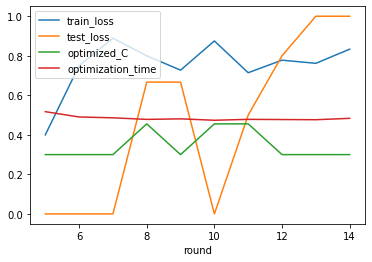

In [ ]:
# slow
_ = eval_df.drop("n_obs", axis=1).plot()
plt.show()

Ok, it appears that with very little data the model is overfitting a lot (observe test loss of 0, meaning that every single prediction went wrong at that round).
Remember that in you application you might be interested in completely different measures!

## Output of this notebook

The result of this notebook is a collection methods ready for evaluation with the real data.

You should export classes and functions to `model.py` with `# nbdev_build_lib` (workflows will do this automatically).

## You can move on to loss notebook!